<h1>Day One<h1>
<h2>Import Dataset & Explore Info<h2>

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


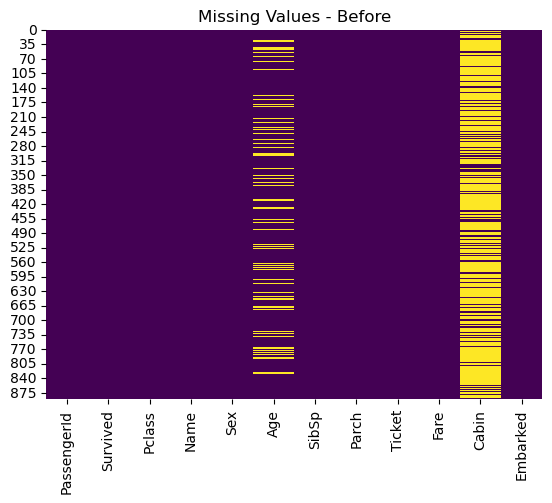


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic-Dataset.csv")

print("Initial Data Info:")
print(df.info())
df.shape

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - Before")
plt.show()

print("\nMissing values:\n", df.isnull().sum())


In [5]:
df.shape

(891, 12)

<h2>Handle Missing Values with Median/Mode<h2>

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [9]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df.drop(columns='Cabin', inplace=True)

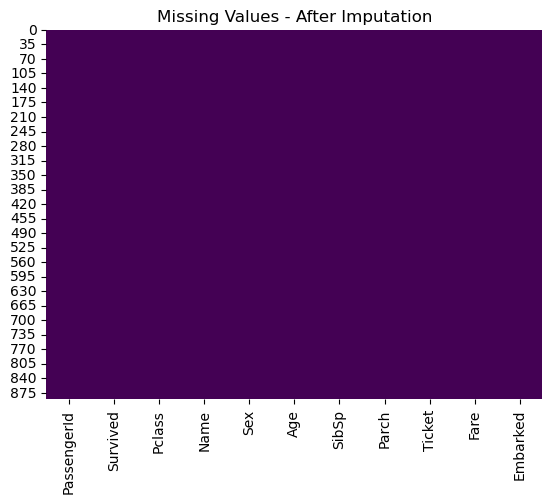

In [16]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - After Imputation")
plt.show()


In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<h2>Convert Categorical to Numerical<h2>

In [23]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [25]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [27]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [29]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [31]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

<h2>Standardize Numerical Features<h2>

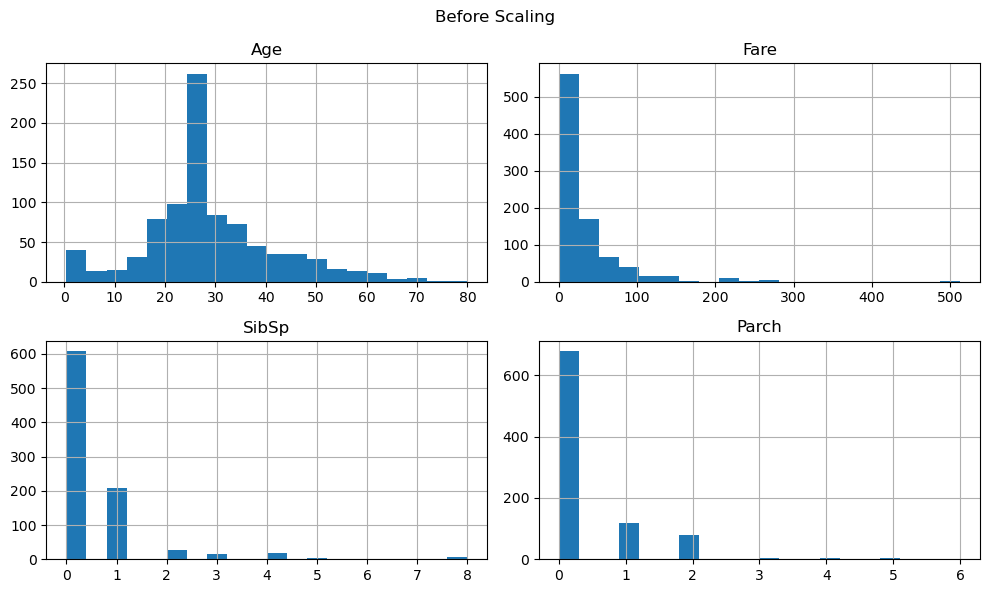

In [35]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

df[numerical_cols].hist(bins=20, figsize=(10, 6))
plt.suptitle("Before Scaling")
plt.tight_layout()
plt.show()




In [37]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

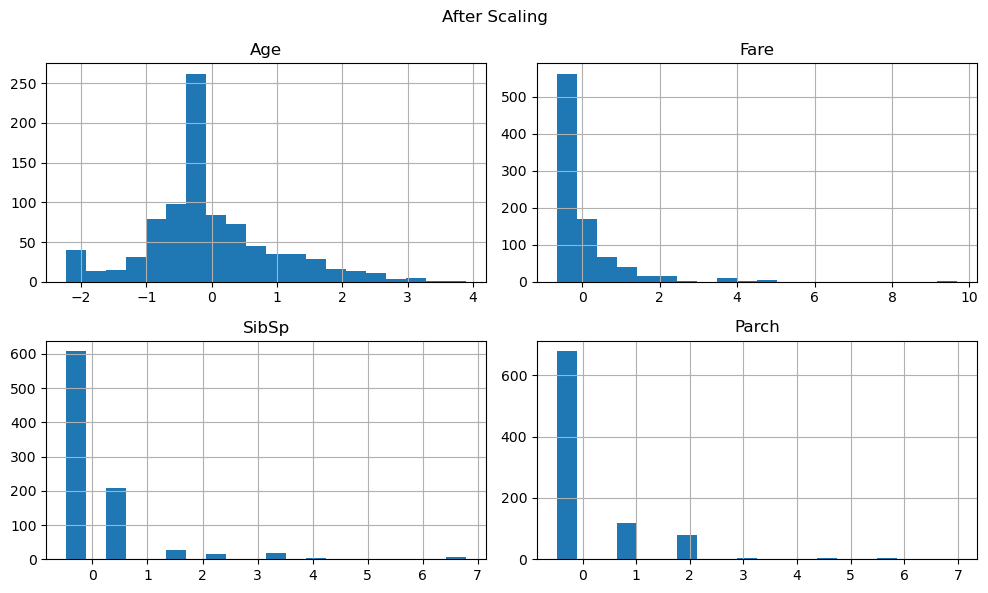

In [39]:
df[numerical_cols].hist(bins=20, figsize=(10, 6))
plt.suptitle("After Scaling")
plt.tight_layout()
plt.show()

<h2>Visualize & Remove Outliers<h2>

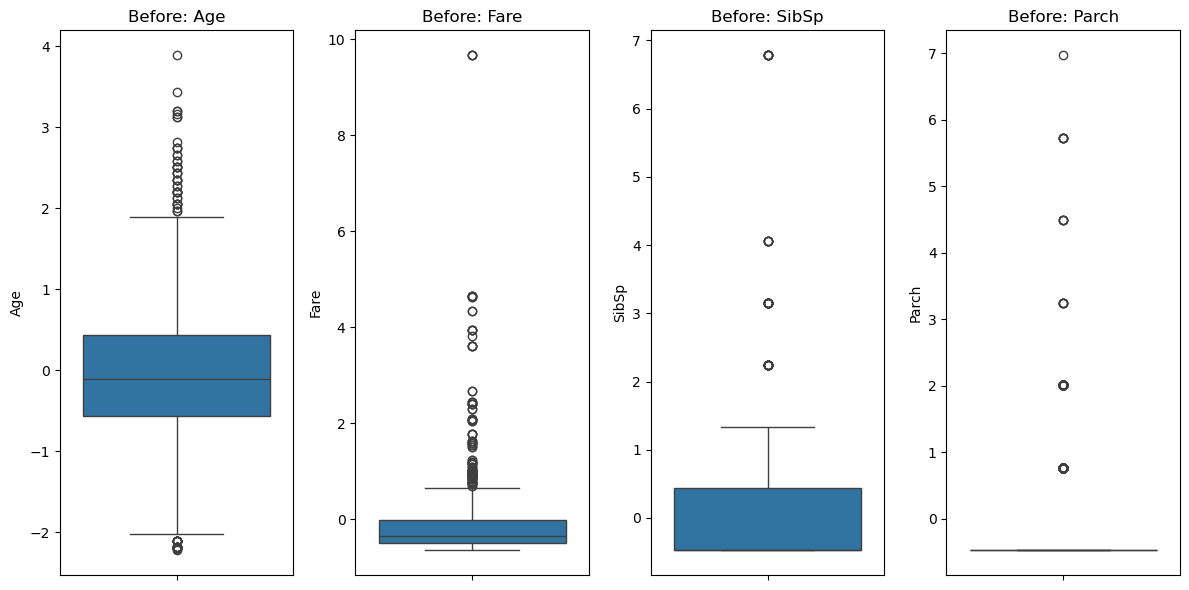

In [42]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Before: {col}')
plt.tight_layout()
plt.show()

In [44]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

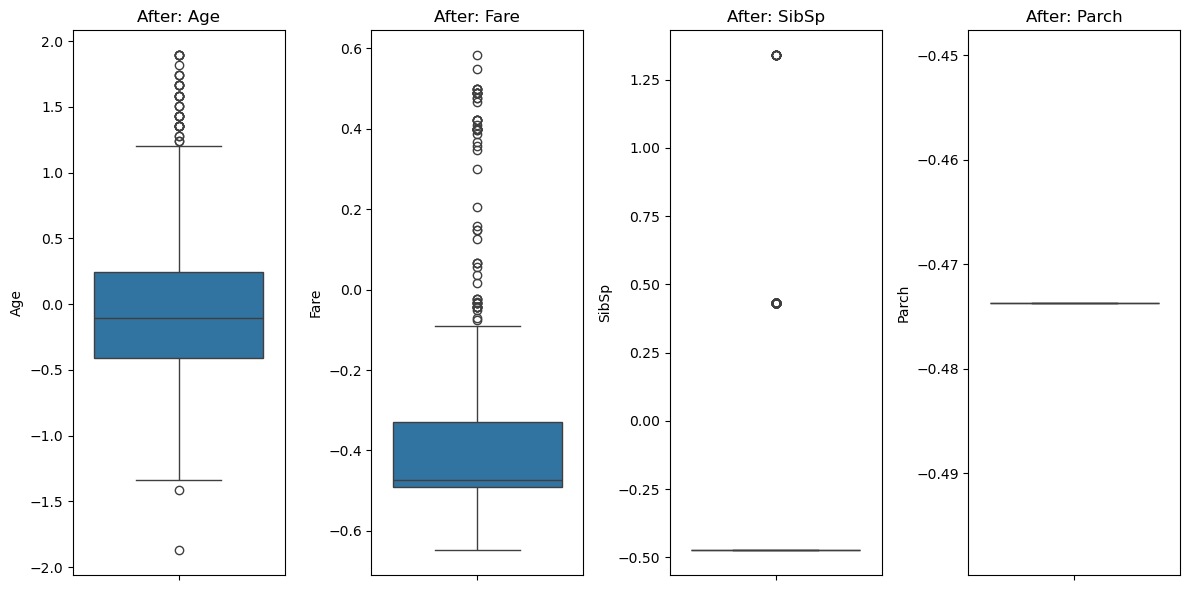

In [46]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'After: {col}')
plt.tight_layout()
plt.show()

In [48]:
df.shape

(577, 12)